**Programmer: python_scripts (Abhijith Warrier)**

**PYTHON SCRIPT TO *FORECAST ONLINE SALES DEMAND USING HISTORICAL SALES DATA*. 🧠📦📈**

This script demonstrates how machine learning can be used to **predict future product demand** based on historical sales patterns. Demand forecasting is critical for inventory planning, supply chain optimization, and revenue forecasting in e-commerce systems.

---

## **📦 Install Required Packages**

**Install core data science and ML libraries.**

In [ ]:
pip install pandas numpy scikit-learn matplotlib

---

## **🧩 Load the Sales Dataset**

**We assume a CSV file containing historical online sales data.**

In [1]:
import pandas as pd

df = pd.read_csv("datasets/online_sales.csv")
df.head()

,date,price,discount,is_promotion,units_sold
0,2024-01-01,499,0,0,42
1,2024-01-02,499,0,0,45
2,2024-01-03,499,10,1,63
3,2024-01-04,489,10,1,67
4,2024-01-05,489,0,0,46


Typical columns include:

- date
- units_sold
- price
- promotions / discounts
- target: future demand (or next-day sales)

---

## **🕒 Convert Date & Create Time-Based Features**

**Time features help models learn seasonality and trends.**

In [2]:
df["date"] = pd.to_datetime(df["date"])
df["day"] = df["date"].dt.day
df["month"] = df["date"].dt.month
df["weekday"] = df["date"].dt.weekday

These engineered features capture weekly and monthly demand patterns.

---

## **🧹 Handle Missing Values**

**Clean missing data before modeling.**

In [3]:
from sklearn.impute import SimpleImputer

num_cols = df.select_dtypes(include="number").columns

imputer = SimpleImputer(strategy="median")
df[num_cols] = imputer.fit_transform(df[num_cols])

---

## **✂️ Prepare Features and Target**

**Separate inputs from the demand target.**

In [4]:
X = df.drop(["date", "units_sold"], axis=1)
y = df["units_sold"]

---

## **✂️ Train/Test Split**

**Split historical data for evaluation.**

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

---

## **🌲 Train a Demand Forecasting Model**

**Random Forest captures non-linear demand patterns well.**

In [6]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    random_state=42
)

model.fit(X_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,12
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


---

## **📊 Evaluate Forecast Accuracy**

**Evaluate predictions using regression metrics.**

In [7]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 3.0659259259259244
R² Score: 0.9347772096710266


These metrics show how closely predictions match actual demand.

---

## **📈 Visualize Actual vs Predicted Demand**

**Visual validation of forecast performance.**

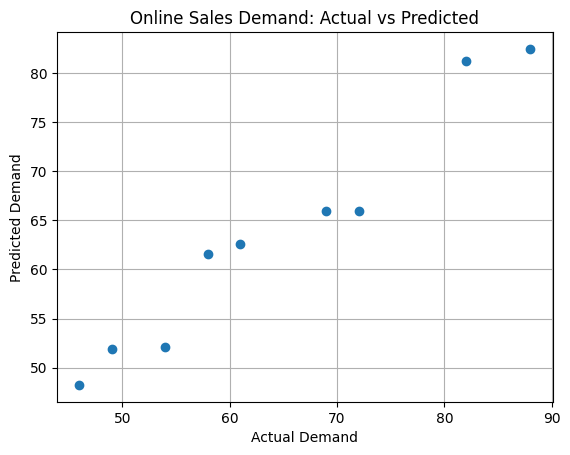

In [8]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Demand")
plt.ylabel("Predicted Demand")
plt.title("Online Sales Demand: Actual vs Predicted")
plt.grid(True)
plt.show()

---

## **🧪 Why Demand Forecasting Matters**

- Prevents overstocking and stockouts
- Improves supply chain efficiency
- Supports pricing and promotion strategies
- Enables data-driven planning

---

## **Key Takeaways**

1. Demand forecasting is a core business ML use case.
2. Time-based feature engineering is critical.
3. Random Forest models handle complex demand patterns well.
4. MAE and R² are essential for evaluating forecasts.
5. ML-driven forecasting improves operational decision-making.

---